# Linear Regression <br>



### Problem Statement
Bike-sharing systems are the new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, the user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.
Apart from interesting real-world applications of bike-sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns a bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.

### Read libraries

Data set : http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import pandas
import pandas as pd

#import numpy
import numpy as np

#import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn
import seaborn as sns

sns.set()

## Step 1: DATA

### Reading Data

In [3]:
#Read data 
bike_Share = pd.read_csv('day.csv')

### Insights of data

In [4]:
#Check first 5 rows of data
bike_Share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Check the number of columns and rows in the dataset
bike_Share.shape

(730, 16)

In [6]:
# Check null counts and data types of features
bike_Share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


#### There is no null or missing values in the dataset

In [7]:
# Summary of numerical columns
bike_Share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2 : Cleaning Data

- 'yr' and 'mnth' columns are present and we can drop dteday column, or if there are any descripencies in these columns, then we can extraxt it from dteday column and drop yr and mnth
- instant is not required as it is just an increamental ID and insignificant
- Casual and Registered are not required as target variable is only Count as given in the problem statement

So, These columns can be removed

In [8]:
#Dropping few columns which are not required

bike_Share.drop(['instant'],axis=1,inplace=True)

- A day is either working day or a holiday and represented by 0/1. So, one of these columns can be dropped

In [9]:
#Dropping holiday column

bike_Share.drop('holiday',axis=1,inplace=True)

In [10]:
bike_Share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(9), object(1)
memory usage: 79.9+ KB


In [11]:
bike_Share.head()

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
bike_Share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(9), object(1)
memory usage: 79.9+ KB


In [13]:
bike_Share.drop('dteday',axis=1,inplace=True)

In [14]:
bike_Share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(9)
memory usage: 74.2 KB


## Step 3 : Encoding and Visualizing data

- There are few categorical features which are considered as int/float which is not correct. 
- In the next step, these categorical values are encoded according to the information provided about the dataset

### weathersit
1 : Clear, few clouds, partly cloudy <br>
2 : Mist and Cloudy <br>
3 : Light snow <br>
4 : Heavy rain <br>

In [15]:
#Encoding weathersit
label = {1:'Clear',2:'Mist',3:'Snow',4:'Rain'}
bike_Share['weathersit'] = bike_Share['weathersit'].map(label)

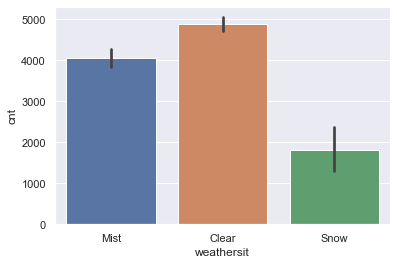

In [16]:
#Visualizing Weathersit
sns.barplot('weathersit','cnt',data=bike_Share)
plt.show()

- When the weather is Clear/Patly cloudy, more people are interested to take a bike for rent
- When it's rainy, No one is willing to take a bike for rent
- During snow weather, very few people are interested to take bike for rent

#### Season
1 : Spring <br>
2 : Summer <br>
3 : Fall <br>
4 : Winter <br>

In [17]:
#Encoding season
label = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike_Share['season'] = bike_Share['season'].map(label)

In [18]:
bike_Share.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,1,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,2,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


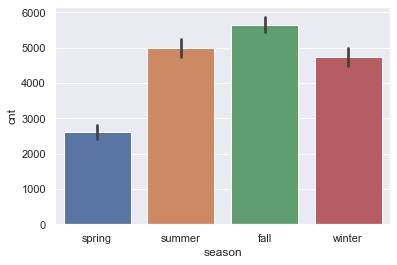

In [19]:
#Visualizing season data
sns.barplot('season','cnt',data=bike_Share)
plt.show()

- People are more interested to take bikes for rent in Fall season

#### Month
1 : 'Jan' <br>
2 : 'Feb' <br>
3 : 'Mar' <br>
4 : 'Apr' <br>
5 : 'May' <br>
6 : 'Jun' <br>
7 : 'Jul' <br>
8 : 'Aug' <br>
9 : 'Sep' <br>
10 : 'Oct' <br>
11 : 'Nov' <br>
12 : 'Dec' <br>

In [20]:
#Encoding of Months
label = {1 : 'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'} 
bike_Share['mnth'] = bike_Share['mnth'].map(label)

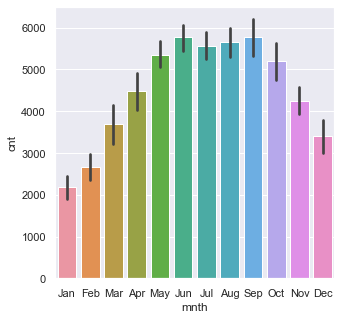

In [21]:
#Visualizing Months data
plt.figure(figsize=(5,5))
sns.barplot('mnth','cnt',data=bike_Share)
plt.show()

- In the month of Jun and Sep Bike rentals are more in number

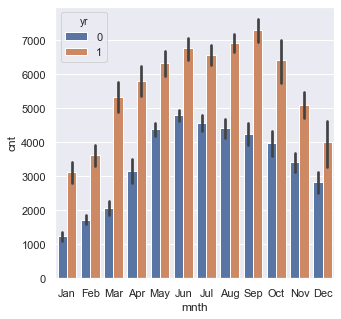

In [22]:
#Visualizing Months data with year
plt.figure(figsize=(5,5))
sns.barplot('mnth','cnt',hue='yr',data=bike_Share)
plt.show()

- People are more interested to take bikes for rent in the month of Jun in the year 2018 as well as 2019 (0 : 2018, 1:2019)

#### Year
2018 : 0 <br>
2019 : 1

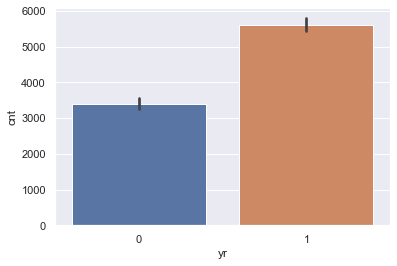

In [23]:
#Visualizing year data
sns.barplot('yr','cnt',data=bike_Share)
plt.show()

- In the year 2019, Bike renting has become popular

#### Working day

0 : Working day and not a holiday <br>
1 : Holiday and not a working day

In [24]:
#Encoding feature data
label = {0:'Workinng',1:'Non_working'}
bike_Share['workingday'] = bike_Share['workingday'].map(label)

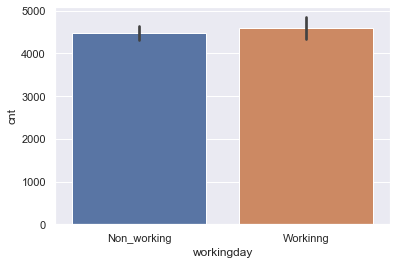

In [25]:
#Visualize the data
sns.barplot('workingday','cnt',data=bike_Share)
plt.show()

- Bikes are rented more on Working days

#### Working days
0 : 'Mon' <br>
1 : 'Tue' <br>
2 : 'Wed' <br>
3 : 'Thu' <br>
4 : 'Fri' <br>
5 : 'Sat' <br>
6 : 'Sun' <br>


In [26]:
#Encoding values
label = {0:'Mon', 1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_Share['weekday'] = bike_Share['weekday'].map(label)

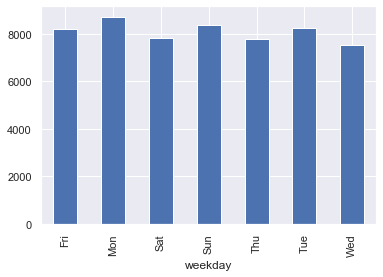

In [27]:
#Visualizing weekdays
bike_Share.groupby('weekday')['cnt'].max().plot(kind='bar')
plt.show()

- Monday and Sunday, people are taking bikes more

#### Humidity

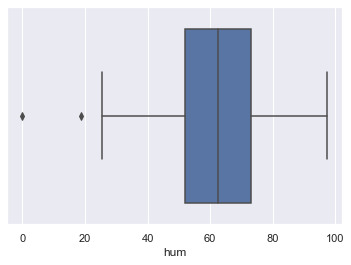

In [28]:
sns.boxplot(x=bike_Share['hum'])
plt.show()

No much outliers are present

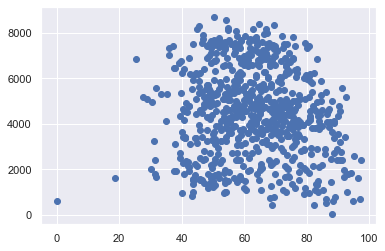

In [29]:
plt.scatter('hum','cnt',data=bike_Share)
plt.show()

- Higher the humidity more the renting, but much linearity is not observed

#### Temperature

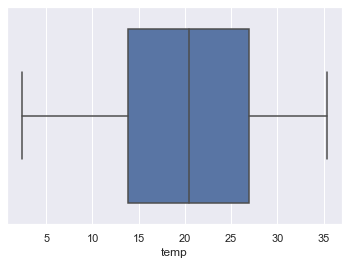

In [30]:
sns.boxplot(x=bike_Share['temp'])
plt.show()

No much outliers are present to treat

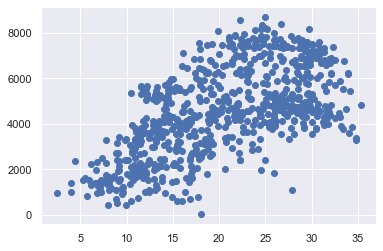

In [31]:
#Visualizing 
plt.scatter('temp','cnt',data=bike_Share)
plt.show()

- More the temperatur, Bike rentals are more

#### Windspeed

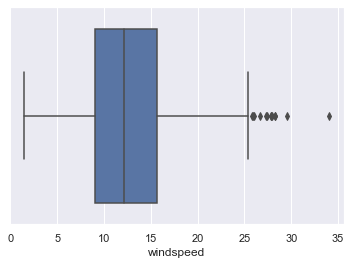

In [32]:
sns.boxplot(x=bike_Share['windspeed'])
plt.show()

No much outliers present

[]

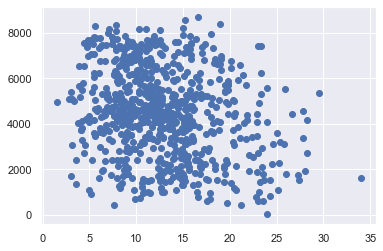

In [33]:
plt.scatter('windspeed','cnt',data=bike_Share)
plt.plot()

- Wind speed is correlated with temperature, but no linearity seems to exist

#### ATemp


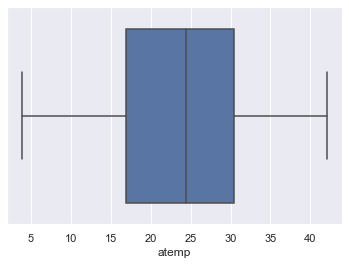

In [34]:
sns.boxplot(x=bike_Share['atemp'])
plt.show()

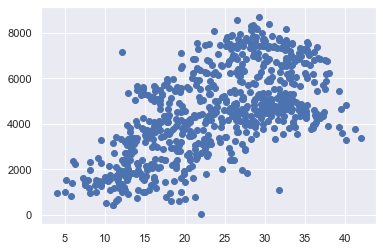

In [35]:
plt.scatter('atemp','cnt',data=bike_Share)
plt.show()

- More the Atem more the bike rentals

#### Casual 

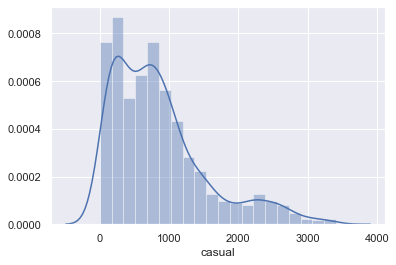

In [36]:
sns.distplot(bike_Share['casual'])
plt.show()

#### Registered

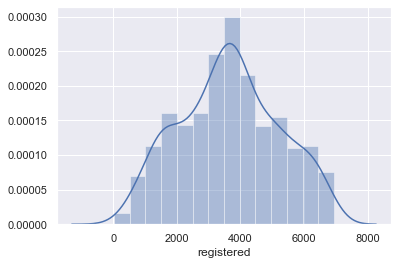

In [37]:
sns.distplot(bike_Share['registered'])
plt.show()

#### Count Feature

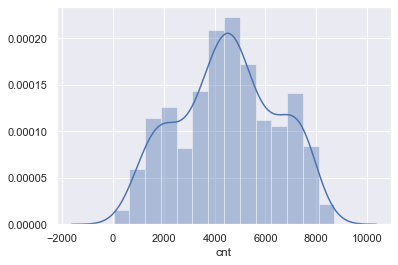

In [38]:
#Visualize count 
sns.distplot(bike_Share['cnt'])
plt.show()

- Looks like a normal distribution

#### Pair plot to visualize relationship among variables

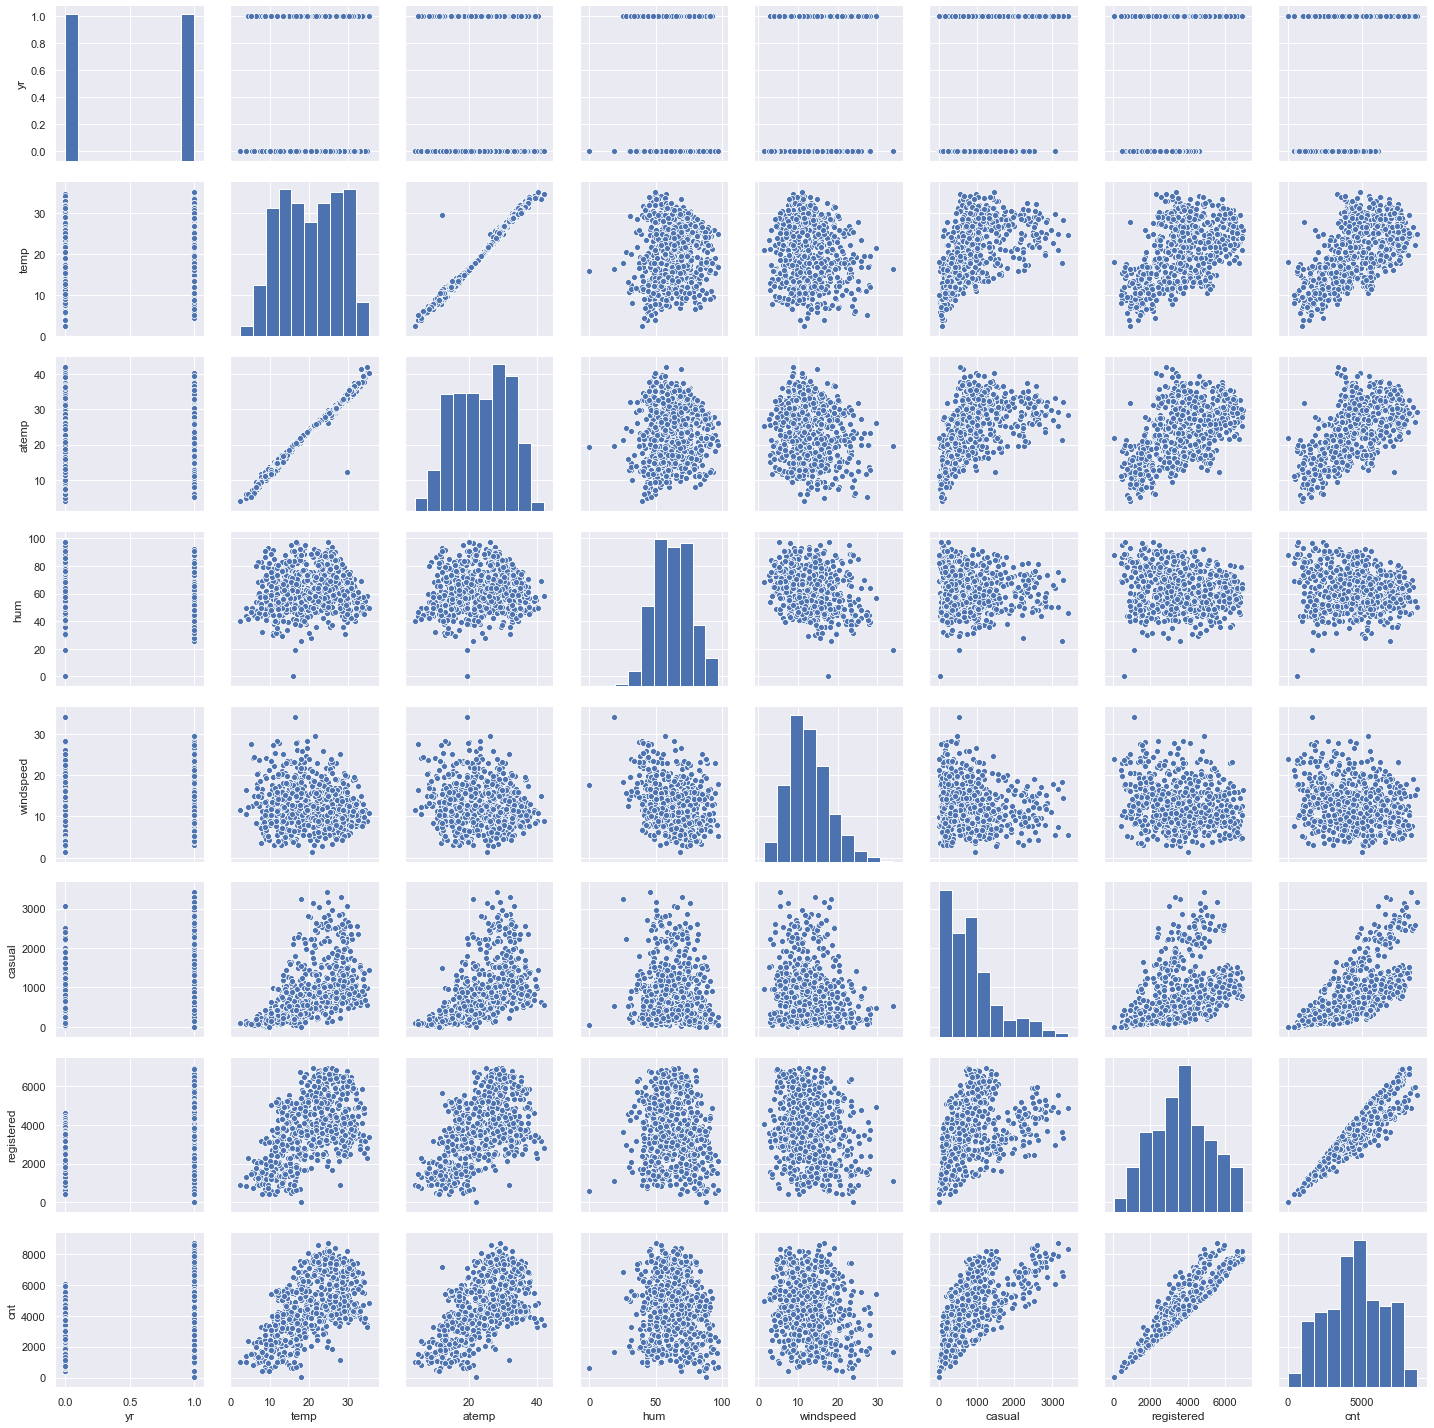

In [39]:
sns.pairplot(bike_Share)
plt.show()

#### Correlation 

In [40]:
cor = bike_Share.corr()
print(cor)

                  yr      temp     atemp       hum  windspeed    casual  \
yr          1.000000  0.048789  0.047215 -0.112547  -0.011624  0.250502   
temp        0.048789  1.000000  0.991696  0.128565  -0.158186  0.542731   
atemp       0.047215  0.991696  1.000000  0.141512  -0.183876  0.543362   
hum        -0.112547  0.128565  0.141512  1.000000  -0.248506 -0.075211   
windspeed  -0.011624 -0.158186 -0.183876 -0.248506   1.000000 -0.167995   
casual      0.250502  0.542731  0.543362 -0.075211  -0.167995  1.000000   
registered  0.596911  0.539436  0.543678 -0.089212  -0.217914  0.394137   
cnt         0.569728  0.627044  0.630685 -0.098543  -0.235132  0.672123   

            registered       cnt  
yr            0.596911  0.569728  
temp          0.539436  0.627044  
atemp         0.543678  0.630685  
hum          -0.089212 -0.098543  
windspeed    -0.217914 -0.235132  
casual        0.394137  0.672123  
registered    1.000000  0.945411  
cnt           0.945411  1.000000  


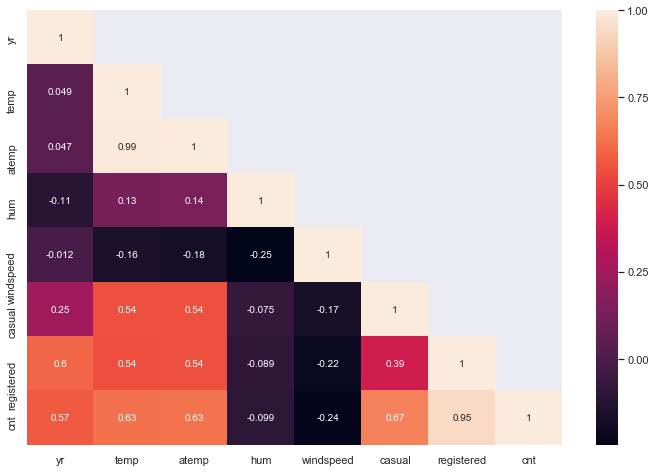

In [41]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(12,8))
sns.heatmap(cor,mask=mask,annot=True)
plt.show()

Temperature and Atemp are highly correlated. This would cause multi colinearity problem. So one of these columns can be dropped.

In [42]:
#Dropping atemp
bike_Share.drop('atemp',axis=1,inplace = True)

In [43]:
#Drop Casual and registered
bike_Share.drop(['casual','registered'],axis=1,inplace=True)

In [44]:
bike_Share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
weekday       730 non-null object
workingday    730 non-null object
weathersit    730 non-null object
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(2), object(5)
memory usage: 57.1+ KB


### Step 4: Categorical variable : One hot encoding

In [45]:
#One hot encoding 

week_day = pd.get_dummies(bike_Share['weekday'],drop_first=True)

working_day = pd.get_dummies(bike_Share['workingday'],drop_first=True)

weather = pd.get_dummies(bike_Share['weathersit'],drop_first=True)

seasons = pd.get_dummies(bike_Share['season'],drop_first=True)

month = pd.get_dummies(bike_Share['mnth'],drop_first=True)

In [46]:
#Concating 
bike_Share = pd.concat([bike_Share,week_day,working_day,weather,seasons,month],axis=1)

In [47]:
bike_Share.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,Tue,Non_working,Mist,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,Wed,Non_working,Mist,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,Thu,Non_working,Clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,Fri,Non_working,Clear,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,Sat,Non_working,Clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [48]:
#Deleting features those are encoded
bike_Share.drop(['season','workingday','weathersit','weekday','mnth'],axis=1,inplace=True)

In [49]:
bike_Share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
yr           730 non-null int64
temp         730 non-null float64
hum          730 non-null float64
windspeed    730 non-null float64
cnt          730 non-null int64
Mon          730 non-null uint8
Sat          730 non-null uint8
Sun          730 non-null uint8
Thu          730 non-null uint8
Tue          730 non-null uint8
Wed          730 non-null uint8
Workinng     730 non-null uint8
Mist         730 non-null uint8
Snow         730 non-null uint8
spring       730 non-null uint8
summer       730 non-null uint8
winter       730 non-null uint8
Aug          730 non-null uint8
Dec          730 non-null uint8
Feb          730 non-null uint8
Jan          730 non-null uint8
Jul          730 non-null uint8
Jun          730 non-null uint8
Mar          730 non-null uint8
May          730 non-null uint8
Nov          730 non-null uint8
Oct          730 non-null uint8
Sep          730 non-null

## Step 5 : Splitting Train-Test data 

#### Importing the package


In [50]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

##### Train- Test split

In [51]:

bS_train, bS_test = train_test_split(bike_Share,train_size=0.7,test_size=0.3,random_state=100)

In [52]:
bS_train.shape

(510, 28)

In [53]:
bS_test.shape

(219, 28)

## Step 6 : Rescaling Features

In [54]:
#Importing packages

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
#Apply scaling to numerical columns
numerical = ['temp','hum','windspeed','cnt']

bS_train[numerical] = scaler.fit_transform(bS_train[numerical])

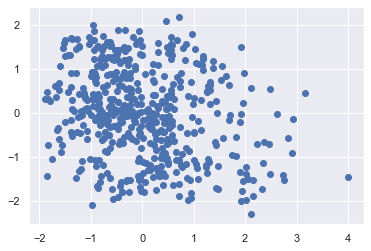

In [56]:
plt.scatter('windspeed','cnt',data=bS_train)
plt.show()

In [57]:
cor = bike_Share.corr()

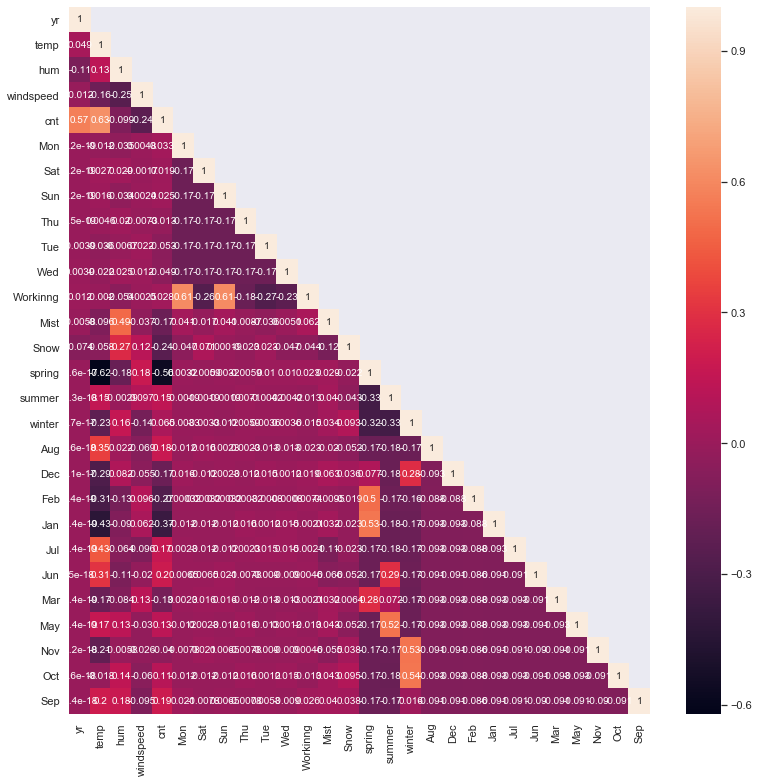

In [58]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(13,13))
sns.heatmap(cor,mask=mask,annot=True)
plt.show()

## Step 7 : Dividing into X and Y

In [59]:

y_train = bS_train.pop('cnt')
X_train = bS_train

In [60]:
X_train.shape

(510, 27)

In [61]:
y_train.shape

(510,)

## Step 8 : Building Linear Model

#### Using RFE - Recursive feature elimination

In [62]:
#Importing Packages

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [63]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('temp', True, 1),
 ('hum', False, 10),
 ('windspeed', False, 8),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 11),
 ('Workinng', True, 1),
 ('Mist', True, 1),
 ('Snow', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('Aug', False, 13),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('Jul', True, 1),
 ('Jun', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 15),
 ('Sep', True, 1)]

In [65]:
columns = X_train.columns[rfe.support_]
columns

Index(['yr', 'temp', 'Mon', 'Sun', 'Workinng', 'Mist', 'Snow', 'spring', 'Jul',
       'Sep'],
      dtype='object')

In [66]:
#Creating X_test dataframe with selected features
X_train_rfe = X_train[columns]

In [67]:
#Add a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [69]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.16e-176
Time:                        16:53:24   Log-Likelihood:                -292.12
No. Observations:                 510   AIC:                             606.2
Df Residuals:                     499   BIC:                             652.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2183      0.037     -5.855      0.000      -0.291      -0.145
yr             1.0473      0.039     27.009      0.000       0.971       1.123
temp           0.4029      0.027     14.765      0.000       0.349       0.457
Mon            0.4613      0.142      3.259      0.001       0.183       0.739
Sun            0.4451      0.142      3.131      0.002       0.166       0.724
Workinng      -0.3710      0.134     -2.777      0.006      -0.633      -0.109
Mist          -0.3619      0.041     -8.739      0.000      -0.443      -0.281
Snow          -1.2971      0.116    -11.212      0.000      -1.524      -1.070
spring        -0.6760      0.057    -11.825      0.000      -0.788      -0.564
Jul           -0.3136      0.082     -3.834      0.000      -0.474      -0.153
Sep            0.2874      0.074      3.884      0.000       0.142       0.433
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.927
Skew:                          -0.645   Prob(JB):                     1.37e-29
Kurtosis:                       5.143   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#Dropping Workinng,Sun,Mon as it is insignificant
X_train_1 = X_train_rfe.drop(['Mon'],1)

In [71]:
X_train_2 = sm.add_constant(X_train_1)
lm_1 = sm.OLS(y_train,X_train_2).fit()

In [72]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     239.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.73e-175
Time:                        16:53:25   Log-Likelihood:                -297.49
No. Observations:                 510   AIC:                             615.0
Df Residuals:                     500   BIC:                             657.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2181      0.038     -5.795      0.000      -0.292      -0.144
yr             1.0463      0.039     26.730      0.000       0.969       1.123
temp           0.4042      0.028     14.673      0.000       0.350       0.458
Sun            0.0459      0.073      0.630      0.529      -0.097       0.189
Workinng       0.0278      0.054      0.514      0.607      -0.078       0.134
Mist          -0.3544      0.042     -8.490      0.000      -0.436      -0.272
Snow          -1.2901      0.117    -11.047      0.000      -1.519      -1.061
spring        -0.6842      0.058    -11.865      0.000      -0.797      -0.571
Jul           -0.3052      0.083     -3.698      0.000      -0.467      -0.143
Sep            0.2731      0.075      3.662      0.000       0.127       0.420
==============================================================================
Omnibus:                       60.871   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.020
Skew:                          -0.641   Prob(JB):                     3.94e-31
Kurtosis:                       5.224   Cond. No.                         7.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All features are with p value less than 0.05

In [73]:
X_train_3 = X_train_2.drop('const',axis=1)

#### VIF 

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
X = X_train_3

vif['Features'] =  X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)


vif = vif.sort_values(by='VIF',ascending= False)

vif

,Features,VIF
3,Workinng,2.15
1,temp,2.00
6,spring,1.88
2,Sun,1.82
0,yr,1.48
4,Mist,1.34
7,Jul,1.33
8,Sep,1.15
5,Snow,1.03


#### All VIF values are less than 5

## Step 9 : Residual Analysis

In [75]:
y_train_pred = lm_1.predict(X_train_2)

Text(0.5, 0, 'Error')

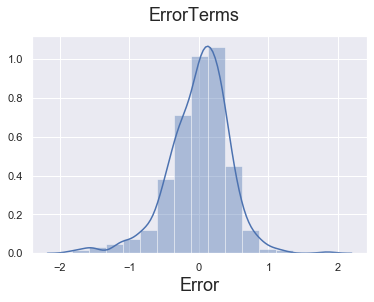

In [76]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred),bins=15)
fig.suptitle('ErrorTerms',fontsize=18)
plt.xlabel('Error',fontsize=18)

## Step 10 : Making Prediction

In [77]:
numerical = ['temp','hum','windspeed','cnt']
bS_test[numerical] = scaler.transform(bS_test[numerical])

In [78]:
#Dividing into X_test and y_test
y_test = bS_test.pop('cnt')
X_test = bS_test

In [79]:
y_test.shape

(219,)

In [80]:
X_test.shape

(219, 27)

In [81]:
X_test_1 = X_test[X_train_3.columns]

X_test_1 = sm.add_constant(X_test_1)

In [82]:
#Making predictions :

y_test_pred = lm_1.predict(X_test_1)

## Step 11 : Model Evaluation

In [83]:
#Visualize the spread

Text(0, 0.5, 'Prediction')

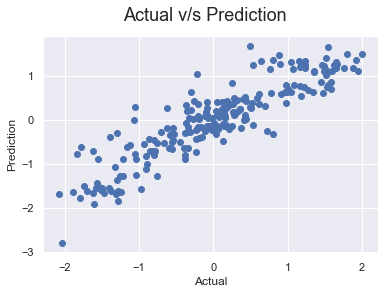

In [84]:
fig=plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual v/s Prediction',fontsize=18)
plt.xlabel('Actual')
plt.ylabel('Prediction')

In [85]:
from sklearn.metrics import r2_score

In [86]:
r2_score(y_test,y_test_pred)

0.8035305530955213

## Step 12 : Conclusion:


Top features contribution to the model linearity :
 
- Snow	 :  -1.2901
- Spring :  -0.6842	
- Temp	 :   0.4042
- Mist	 :  -0.3544
- Jul	 : -0.3052
- Sep	 :   0.2731
- Sun	 :  0.0459
- Workinng:  0.0278
- yr	  :  1.0463
